## 题解1
#### 1.1

In [1]:
# 导入所需的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print("done")

done


- 先查看数据的基本情况,检查缺失

In [2]:
# 读取训练集和测试集
train_df = pd.read_csv('E:\\download\\AI派2025招新第一轮测试\\AI派2025招新第一轮测试\\MBAAdmission\\train.csv')  
test_df = pd.read_csv('E:\\download\\AI派2025招新第一轮测试\\AI派2025招新第一轮测试\\MBAAdmission\\test.csv')

print(train_df.head())
# print(train_df.tail())

print(f"训练集形状: {train_df.shape}")  #
print(f"测试集形状: {test_df.shape}")  #

print("特征列名: ", train_df.columns.tolist()) #

print(train_df.info())  # info方法查看类型和缺失值
print(test_df.info())


   application_id  gender international   gpa       major      race   gmat  \
0               1  Female         False  3.30    Business     Asian  620.0   
1               2    Male         False  3.28  Humanities     Black    NaN   
2               3  Female          True  3.30    Business       NaN  710.0   
3               4    Male         False  3.47        STEM     Black  690.0   
4               5    Male         False  3.35        STEM  Hispanic  590.0   

   work_exp          work_industry admission  
0       3.0     Financial Services     Admit  
1       5.0  Investment Management    Reject  
2       5.0             Technology     Admit  
3       NaN             Technology    Reject  
4       5.0             Consulting    Reject  
训练集形状: (6095, 10)
测试集形状: (99, 10)
特征列名:  ['application_id', 'gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp', 'work_industry', 'admission']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6095 entries, 0 to 6094
Data columns (

- 先对已有数据求出application_id,gpa,gmat,work_exp基本的统计信息,方便填入缺失的信息.
类别型特征的缺失值常用众数填充

In [3]:
print(train_df.isnull().sum())
# 例如：race 列可能因国际学生无数据而出现缺失
# # 对数值列（如 gpa、gmat、work_exp）进行统计描述
print(train_df.describe())  # 包含均值、标准差、最小值、最大值、分位数等

non_num_cols = train_df.select_dtypes(include=['object'])
#non_num_cols_test = test_df.select_dtypes(include=['object'])

print(non_num_cols.count())
non_num_cols = non_num_cols.columns.tolist()
#non_num_cols_ = non_num_cols_.colums.tolist()

for col in non_num_cols:
    print(f"===== 特征：{col} =====")
    
    # 获取唯一类别（含缺失值可保留）
    unique_categories = train_df[col].unique()
    print(f"唯一类别（共{len(unique_categories)}种）：{unique_categories}")
    #temp["唯一类别数"].append(len(unique_categories))
    
    # 获取每个类别的出现次数（排除缺失值，按降序排列）
    value_counts = train_df[col].value_counts(dropna=False)  # dropna=False包含缺失值
    #temp["类别"].append(value_counts.keys().tolist())
    print("类别出现次数：")
    print(value_counts)
    print("\n" + "-"*50 + "\n")  # 分隔线
# 按逻辑填补缺失值
train_df['gender'] = train_df['gender'].fillna(train_df['gender'].mode()[0])
train_df['international'] = train_df['international'].fillna(train_df['international'].mode()[0])
train_df['gpa'] = train_df['gpa'].fillna(train_df['gpa'].mean())
train_df['major'] = train_df['major'].fillna(train_df['major'].mode()[0])
train_df['race'] = train_df['race'].fillna(train_df['race'].mode()[0])
train_df['gmat'] = train_df['gmat'].fillna(train_df['gmat'].median())
train_df['work_exp'] = train_df['work_exp'].fillna(0)
train_df['work_industry'] = train_df['work_industry'].fillna('other')

test_df['gender'] = test_df['gender'].fillna(test_df['gender'].mode()[0])
test_df['international'] = test_df['international'].fillna(test_df['international'].mode()[0])
test_df['gpa'] = test_df['gpa'].fillna(test_df['gpa'].mean())
test_df['major'] = test_df['major'].fillna(test_df['major'].mode()[0])
test_df['race'] = test_df['race'].fillna(test_df['race'].mode()[0])
test_df['gmat'] = test_df['gmat'].fillna(test_df['gmat'].median())
test_df['work_exp'] = test_df['work_exp'].fillna(0)
test_df['work_industry'] = test_df['work_industry'].fillna('other')
print(train_df.isnull().sum())


# 注：mode() 返回 Series，取 [0] 获取第一个众数

application_id       0
gender             305
international      305
gpa                305
major              305
race              2033
gmat               305
work_exp           305
work_industry      305
admission            0
dtype: int64
       application_id          gpa         gmat     work_exp
count     6095.000000  5790.000000  5790.000000  5790.000000
mean      3104.612141     3.249636   650.818653     5.021934
std       1785.573306     0.151287    49.415865     1.034741
min          1.000000     2.650000   570.000000     1.000000
25%       1560.500000     3.150000   610.000000     4.000000
50%       3101.000000     3.250000   650.000000     5.000000
75%       4651.500000     3.350000   680.000000     6.000000
max       6194.000000     3.770000   780.000000     9.000000
gender           5790
international    5790
major            5790
race             4062
work_industry    5790
admission        6095
dtype: int64
===== 特征：gender =====
唯一类别（共3种）：['Female' 'Male' nan]
类别出现次数：
g

C:\Users\17396\AppData\Local\Temp\ipykernel_40012\4014278519.py:29: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['international'] = train_df['international'].fillna(train_df['international'].mode()[0])


In [4]:
# 对分类特征进行one-hot编码
# 首先确定需要编码的分类列（通常是object类型的列）
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
categorical_cols_ = test_df.select_dtypes(include=['object']).columns.tolist()
# gender he international 不用onehot
exclude_cols = ['international','gender','admission']

categorical_cols = [col for col in categorical_cols if col not in exclude_cols]
categorical_cols_ = [col for col in categorical_cols_ if col not in exclude_cols]
print(f"将对以下分类列进行one-hot编码: {categorical_cols}")

# 进行one-hot编码
print(train_df.head(1))
train_df_encoded = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
train_df_encoded['international'] = train_df['international'].map({True: 1, False: 0})#对international进行二进制编码
train_df_encoded['gender'] = train_df['gender'].map({'Male': 1, 'Female': 0})#对gender进行标签编码
train_df_encoded['admission'] = train_df['admission'].map({'Reject': 1, 'Waitlist': 0,'Admit':2})#对admission进行标签编码

test_df_encoded = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)
test_df_encoded['international'] = test_df['international'].map({True: 1, False: 0})#对international进行二进制编码
test_df_encoded['gender'] = test_df['gender'].map({'Male': 1, 'Female': 0})#对gender进行标签编码
test_df_encoded['admission'] = test_df['admission'].map({'Reject': 1, 'Waitlist': 0,'Admit':2})#对admission进行标签编码
for col in train_df_encoded:
    if col not in test_df_encoded.columns:
        print("===")
        print(col)
        test_df_encoded[col] = 0
# 查看编码后的数据集形状
print(f"编码前数据集形状: {train_df.shape}")
print(f"编码后数据集形状: {train_df_encoded.shape}")
print(f"编码前数据集形状2: {test_df.shape}")
print(f"编码后数据集形状2: {test_df_encoded.shape}")

# 查看前几行编码结果
print("\n编码后的数据集前5行:")
print(train_df_encoded.head(1))
print("\n编码后的数据集前5行:")
print(test_df_encoded.head(1))


将对以下分类列进行one-hot编码: ['major', 'race', 'work_industry']
   application_id  gender  international  gpa     major   race   gmat  \
0               1  Female          False  3.3  Business  Asian  620.0   

   work_exp       work_industry admission  
0       3.0  Financial Services     Admit  
===
work_industry_Real Estate
===
work_industry_Retail
===
work_industry_other
编码前数据集形状: (6095, 10)
编码后数据集形状: (6095, 27)
编码前数据集形状2: (99, 10)
编码后数据集形状2: (99, 27)

编码后的数据集前5行:
   application_id  gender  international  gpa   gmat  work_exp  admission  \
0               1       0              0  3.3  620.0       3.0          2   

   major_Humanities  major_STEM  race_Black  ...  \
0             False       False       False  ...   

   work_industry_Investment Banking  work_industry_Investment Management  \
0                             False                                False   

   work_industry_Media/Entertainment  work_industry_Nonprofit/Gov  \
0                              False                  

对数值取值差异大的连续型gpa,gmat,work_exp进行归一化

In [5]:

# 数据标准化
train_df_encoded['gpa'] = (train_df['gpa'] - train_df['gpa'].mean()) / train_df['gpa'].std()
train_df_encoded['gmat'] = (train_df['gmat'] - train_df['gmat'].mean()) / train_df['gmat'].std()
train_df_encoded['work_exp'] = (train_df['work_exp'] - train_df['work_exp'].mean()) / train_df['work_exp'].std()

# 数据标准化_test
test_df_encoded['gpa'] = (test_df['gpa'] - test_df['gpa'].mean()) / test_df['gpa'].std()
test_df_encoded['gmat'] = (test_df['gmat'] - test_df['gmat'].mean()) / test_df['gmat'].std()
test_df_encoded['work_exp'] = (test_df['work_exp'] - test_df['work_exp'].mean()) / test_df['work_exp'].std()
print(test_df_encoded.head(1))


   application_id  gender  international       gpa      gmat  work_exp  \
0              13       0              0 -0.394146 -0.687983  0.842213   

   admission  major_Humanities  major_STEM  race_Black  ...  \
0          0              True       False       False  ...   

   work_industry_Investment Banking  work_industry_Investment Management  \
0                             False                                False   

   work_industry_Media/Entertainment  work_industry_Nonprofit/Gov  \
0                              False                        False   

   work_industry_Other  work_industry_PE/VC  work_industry_Technology  \
0                False                 True                     False   

   work_industry_Real Estate  work_industry_Retail  work_industry_other  
0                          0                     0                    0  

[1 rows x 27 columns]



训练MLP分类器...
特征数据形状: (6095, 25)
目标变量形状: (6095, 1)

前5行特征数据:
[[ 0.          0.          0.34156432 -0.63902234 -1.18939646  0.
   0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 1.          0.          0.20592717 -0.01614673  0.15407489  1.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          1.          0.34156432  1.22960447  0.15407489  0.
   0.          0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          1.
   0.        ]
 [ 1.          0.          1.49448005  0.81435407 -3.20460349  0.
   1.          1.          0.        

d:\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 2, loss = 0.46639103
Validation score: 0.854098
Iteration 3, loss = 0.40536525
Validation score: 0.854098
Iteration 4, loss = 0.38875887
Validation score: 0.852459
Iteration 5, loss = 0.38202715
Validation score: 0.855738
Iteration 6, loss = 0.37852788
Validation score: 0.854098
Iteration 7, loss = 0.37596292
Validation score: 0.855738
Iteration 8, loss = 0.37402700
Validation score: 0.854098
Iteration 9, loss = 0.37238735
Validation score: 0.852459
Iteration 10, loss = 0.37080417
Validation score: 0.854098
Iteration 11, loss = 0.36932035
Validation score: 0.852459
Iteration 12, loss = 0.36808111
Validation score: 0.855738
Iteration 13, loss = 0.36693427
Validation score: 0.847541
Iteration 14, loss = 0.36601689
Validation score: 0.852459
Iteration 15, loss = 0.36492467
Validation score: 0.852459
Iteration 16, loss = 0.36395838
Validation score: 0.855738
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.

模型评估:
测试集准确率: 0.3333

分类报告:
 

d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


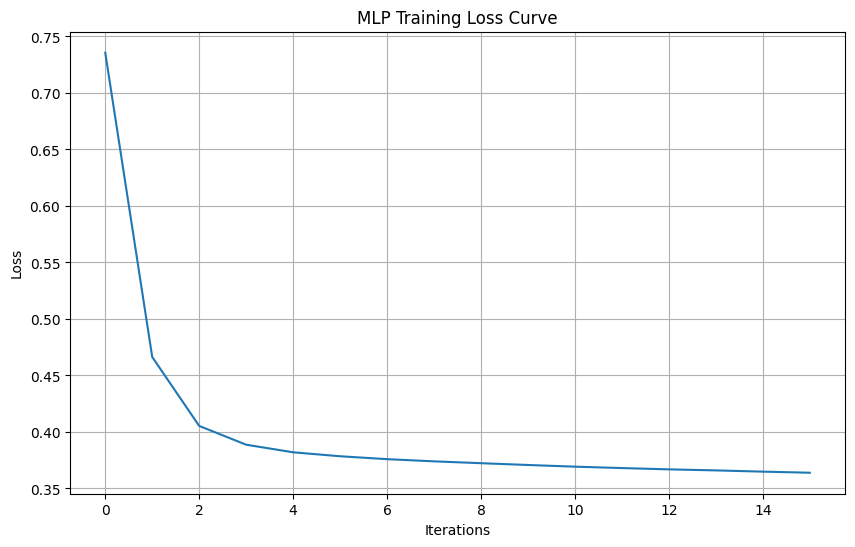

In [6]:
import numpy as np
import scipy as sp
import sklearn as sk
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier

lr = 0.0001
epoch = 50
batch = 64
# 4. 使用scikit-learn的MLP分类器
print("\n训练MLP分类器...")
#x_train = np.array(train_df.drop(columns=['admission']))

# train_df_encoded['admission_status'] = 0  # 默认拒绝
# train_df_encoded.loc[train_df_encoded['admission_Waitlist'] == True, 'admission_status'] = 1
# train_df_encoded.loc[(train_df_encoded['admission_Reject'] == False) & (train_df_encoded['admission_Waitlist'] == False), 'admission_status'] = 2

for col in train_df_encoded.columns:
    if train_df_encoded[col].dtype == bool:
        train_df_encoded[col] = train_df_encoded[col].map({True: 1, False: 0})

for col in test_df_encoded.columns:
    if test_df_encoded[col].dtype == bool:
        test_df_encoded[col] = test_df_encoded[col].map({True: 1, False: 0})
# 3. 选择特征列（排除ID、目标变量相关列）
feature_cols = [col for col in train_df_encoded.columns if col not in [
    'application_id','admission'
]]
feature_cols_ = [col for col in test_df_encoded.columns if col not in [
    'application_id','admission'
]]
#print(train_df_encoded.columns)
# 4. 转换为NumPy数组
X_train = train_df_encoded[feature_cols].to_numpy()  # 特征数据
y_train = train_df_encoded[['admission']].to_numpy()  # 目标变量

X_test = test_df_encoded[feature_cols_].to_numpy()  # 特征数据
y_test = test_df_encoded[['admission']].to_numpy()  # 目标变量
print("特征数据形状:", X_train.shape)
print("目标变量形状:", y_train.shape)
print("\n前5行特征数据:")
print(X_train[:5])
print("\n前5行目标变量:")
print(y_train[:5])
# hidden_dim
# [input_dim, 128], ReLU()
# [128, 256], ReLU()
# [256, output_dim]
# 定义MLP模型，使用指定的隐藏层结构

mlp = MLPClassifier(
    hidden_layer_sizes=(128, 256),  # 第一层128个神经元，第二层256个神经元
    activation='relu',              # 使用ReLU激活函数，符合要求
    solver='adam',                  # Adam优化器，适合大多数场景
    alpha=0.001,                   # L2正则化参数
    batch_size=batch,              # 自动决定批次大小
    learning_rate='constant',       # 固定学习率
    learning_rate_init=lr,       # 初始学习率
    max_iter=epoch,                   # 最大迭代次数
    shuffle=True,                   # 每次迭代前打乱数据
    random_state=42,                # 随机种子，保证结果可复现
    verbose=True,                   # 训练过程中打印日志
    early_stopping=True,            # 启用早停策略
    validation_fraction=0.1,        # 10%的训练数据作为验证集
    tol=1e-4,                       # 早停的容差
    n_iter_no_change=10             # 10轮迭代无改善则停止
)
X_train_for_torch = X_train
y_train_for_torch = y_train
mlp.fit(X_train, y_train)

# 5. 模型评估
print("\n模型评估:")
y_pred = mlp.predict(X_test)
y_pred_proba = mlp.predict_proba(X_test)[:, 1]  # 正类的预测概率

print(f"测试集准确率: {accuracy_score(y_test, y_pred):.4f}")
print("\n分类报告:")
print(classification_report(y_test, y_pred))
# print("\n混淆矩阵:")
# print(confusion_matrix(y_test, y_pred))

# 6. 绘制训练损失曲线
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_)
plt.title('MLP Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

class MLP(nn.Module):
    def __init__(self, input_dim, num_classes, dropout_rate=0.2):
        # 在初始化模型之前添加
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        super().__init__()
        self.linear1 = nn.Linear(input_dim, 128)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.linear2 = nn.Linear(128, 256)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.linear3 = nn.Linear(256, num_classes)
        
    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.dropout1(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.linear3(x)
        return x
    
    def predict(self, x):
        x = x.to(self.device)
        with torch.no_grad():
            outputs = self.forward(x)
            return torch.argmax(outputs, dim=1)
    
    def fit(self, X_train, y_train, X_val=None, y_val=None, epochs=100, lr=0.001, batch_size=32):
        """
        训练模型
        
        参数:
        X_train: 训练特征，形状为 [样本数, 特征数]
        y_train: 训练标签，形状为 [样本数]，每个元素是0,1,2之类的类别索引
        """
        # 确保标签是长整型
        if not isinstance(y_train, torch.Tensor):
            y_train = torch.tensor(y_train, dtype=torch.long)
        elif y_train.dtype != torch.long:
            y_train = y_train.long()
        
        optimizer = optim.Adam(self.parameters(), lr=lr)
        criterion = nn.CrossEntropyLoss()
        
        # 创建数据加载器
        dataset = torch.utils.data.TensorDataset(X_train, y_train)
        dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
        
        
        for epoch in range(epochs):
            total_loss = 0
            self.train()  # 设置为训练模式
            
            for batch_X, batch_y in dataloader:
                batch_X, batch_y = batch_X.to(self.device), batch_y.to(self.device)
                optimizer.zero_grad()
                outputs = self.forward(batch_X)
                loss = criterion(outputs, batch_y)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
            
            avg_loss = total_loss / len(dataloader)
            
            if (epoch + 1) % 10 == 0:
                print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')
                
                # 验证集评估
                if X_val is not None and y_val is not None:
                    val_accuracy = self.evaluate(X_val, y_val)
                    print(f'Validation Accuracy: {val_accuracy:.4f}')
    
    def evaluate(self, X, y):
        """评估模型性能"""
        # 在evaluate方法中：
        X, y = X.to(self.device), y.to(self.device)
        self.eval()  # 设置为评估模式
        with torch.no_grad():
            # 预测结果需要计算指标时：
            predictions = self.predict(X)
            predictions = predictions.cpu().numpy()
            y_true = y.cpu().numpy()
            accuracy = accuracy_score(y_true, predictions)
        return accuracy

# 使用示例
# 确保您的数据格式正确：
# X_train_for_torch: 形状为 [样本数, 特征数] 的numpy数组或tensor
# y_train_for_torch: 形状为 [样本数] 的类别索引数组 (如 [0, 1, 2, 0, 1, 2,...])



X_train = torch.tensor(X_train_for_torch, dtype=torch.float32)
y_train = torch.tensor(y_train_for_torch, dtype=torch.long)
y_train = y_train.squeeze()

# cuda = torch.device('cuda')
# X_train = X_train.to(cuda)
# y_train = y_train.to(cuda)

# 检查标签格式
print(f"标签形状: {y_train.shape}")
print(f"标签唯一值: {torch.unique(y_train)}")
print(f"标签范围: {y_train.min()} 到 {y_train.max()}")

input_dim = X_train.shape[1]
num_classes = len(torch.unique(y_train))
print(f"输入维度: {input_dim}, 类别数: {num_classes}")

mlp = MLP(input_dim, num_classes)
mlp = mlp.to(mlp.device)  # 将模型移动到GPU
mlp.fit(X_train, y_train,epochs = epoch,lr = lr)

# 预测
X_test = torch.tensor(X_test, dtype=torch.float32)
y_pred = mlp.predict(X_test)
y_pred = y_pred.cpu().numpy()

acr =0
for i ,j in zip(y_test,y_pred):
    if i == j:
        acr+=1
    else:
        pass
acr = acr/len(y_test)
print(f'准确率为：{acr}')


标签形状: torch.Size([6095])
标签唯一值: tensor([0, 1, 2])
标签范围: 0 到 2
输入维度: 25, 类别数: 3
Epoch [10/50], Loss: 0.3720
Epoch [20/50], Loss: 0.3651
Epoch [30/50], Loss: 0.3565
Epoch [40/50], Loss: 0.3524
Epoch [50/50], Loss: 0.3470
准确率为：0.3333333333333333


C:\Users\17396\AppData\Local\Temp\ipykernel_40012\1785412010.py:122: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import matplotlib.font_manager as fm
# from matplotlib.ticker import PercentFormatter
# import warnings

# # -------------------------- 1. 字体设置（彻底解决中文显示问题）--------------------------
# # 强制指定支持完整中文的字体列表，按优先级排序
# plt.rcParams["font.family"] = ["SimHei", "WenQuanYi Micro Hei", "Heiti TC", "Microsoft YaHei", "Arial Unicode MS"]
# plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# # 验证字体是否有效
# def verify_chinese_font():
#     try:
#         fig = plt.figure()
#         ax = fig.add_subplot(111)
#         ax.text(0.5, 0.5, '测试中文显示：录取、沃顿商学院、均值', 
#                 ha='center', va='center', fontsize=12)
#         plt.close(fig)
#         return True
#     except:
#         return False

# # 如果字体验证失败，尝试更通用的配置
# if not verify_chinese_font():
#     plt.rcParams["font.family"] = ["Arial Unicode MS", "sans-serif"]

# plt.rcParams['font.size'] = 10
# plt.rcParams['figure.dpi'] = 100
# plt.style.use('seaborn-v0_8-whitegrid')

# # 定义沃顿风格配色
# colors = ['#2E86AB', '#A23B72', '#F18F01']  # 沃顿蓝、紫色、橙色


# # -------------------------- 2. 核心可视化函数（保持不变）--------------------------
# def plot_wharton_admission_overview(df):
#     """1. 沃顿申请整体概览：录取率+关键结构特征"""
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
#     # 子图1：录取状态分布
#     admission_count = df['admission'].value_counts()
#     admission_pct = df['admission'].value_counts(normalize=True) * 100
    
#     wedges, texts, autotexts = ax1.pie(
#         admission_count.values, 
#         labels=admission_count.index,
#         autopct='%1.1f%%',
#         colors=colors,
#         startangle=90,
#         textprops={'fontsize': 11}
#     )
#     ax1.set_title('沃顿商学院2025届申请录取状态分布\n（总申请数：{}）'.format(len(df)), fontsize=13, pad=20)
    
#     # 子图2：核心结构特征汇总
#     gender_pct = df['gender'].value_counts(normalize=True) * 100
#     international_pct = df['international'].value_counts(normalize=True) * 100
#     major_pct = df['major'].value_counts(normalize=True) * 100
    
#     summary_text = f"""
#     申请者核心结构：
#     • 性别比例：男性 {gender_pct.get('男', 0):.1f}% / 女性 {gender_pct.get('女', 0):.1f}%
#     • 国际学生占比：{international_pct.get('是', 0):.1f}%
#     • 本科专业分布：
#       - 商科 {major_pct.get('商科', 0):.1f}%
#       - 理工科 {major_pct.get('理工科', 0):.1f}%
#       - 人文学科 {major_pct.get('人文学科', 0):.1f}%
#     """
#     ax2.text(0.1, 0.9, summary_text, transform=ax2.transAxes, 
#              fontsize=12, verticalalignment='top',
#              bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))
#     ax2.axis('off')
#     ax2.set_title('申请者核心结构概览', fontsize=13, pad=20)
    
#     plt.tight_layout()
#     plt.show()


# def plot_academic_indicators(df):
#     """2. 学术硬指标分析：GPA/GMAT分布+与录取的关系"""
#     fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
#     # 子图1：GPA整体分布
#     sns.histplot(df['gpa'], kde=True, bins=20, color='#2E86AB', ax=ax1)
#     ax1.axvline(df['gpa'].mean(), color='red', linestyle='--', linewidth=2, 
#                 label=f'均值：{df["gpa"].mean():.2f}')
#     ax1.set_title('申请者GPA分布（4.0分制）', fontsize=12)
#     ax1.set_xlabel('GPA')
#     ax1.set_ylabel('申请人数')
#     ax1.legend()
    
#     # 子图2：GMAT整体分布
#     sns.histplot(df['gmat'], kde=True, bins=20, color='#A23B72', ax=ax2)
#     ax2.axvline(df['gmat'].mean(), color='red', linestyle='--', linewidth=2, 
#                 label=f'均值：{df["gmat"].mean():.0f}')
#     ax2.set_title('申请者GMAT分布（满分800）', fontsize=12)
#     ax2.set_xlabel('GMAT分数')
#     ax2.set_ylabel('申请人数')
#     ax2.legend()
    
#     # 子图3：不同录取状态的GPA箱线图
#     sns.boxplot(x='admission', y='gpa', data=df, hue='admission',
#                 palette=colors, ax=ax3, legend=False)
#     ax3.set_title('不同录取状态的GPA分布', fontsize=12)
#     ax3.set_xlabel('录取状态')
#     ax3.set_ylabel('GPA')
#     # 添加各组均值标注
#     for i, status in enumerate(df['admission'].unique()):
#         mean_gpa = df[df['admission'] == status]['gpa'].mean()
#         ax3.text(i, mean_gpa + 0.05, f'均值：{mean_gpa:.2f}', ha='center', fontsize=10)
    
#     # 子图4：不同录取状态的GMAT箱线图
#     sns.boxplot(x='admission', y='gmat', data=df, hue='admission',
#                 palette=colors, ax=ax4, legend=False)
#     ax4.set_title('不同录取状态的GMAT分布', fontsize=12)
#     ax4.set_xlabel('录取状态')
#     ax4.set_ylabel('GMAT分数')
#     # 添加各组均值标注
#     for i, status in enumerate(df['admission'].unique()):
#         mean_gmat = df[df['admission'] == status]['gmat'].mean()
#         ax4.text(i, mean_gmat + 20, f'均值：{mean_gmat:.0f}', ha='center', fontsize=10)
    
#     plt.tight_layout()
#     plt.show()


# # -------------------------- 3. 其他函数和主程序（保持不变）--------------------------
# def plot_work_background(df):
#     """3. 工作背景分析：行业分布+工作年限与录取的关系"""
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
    
#     # 子图1：工作行业分布（Top8行业）
#     work_industry_count = df['work_industry'].value_counts()
#     top8_industries = work_industry_count.head(8)
#     other_count = work_industry_count.iloc[8:].sum()
#     if other_count > 0:
#         top8_industries['其他'] = other_count
    
#     sns.barplot(x=top8_industries.values, y=top8_industries.index, color='#F18F01', ax=ax1)
#     # 添加数量+占比标注
#     total = len(df)
#     for i, (industry, count) in enumerate(top8_industries.items()):
#         pct = (count / total) * 100
#         ax1.text(count + 5, i, f'{count}人（{pct:.1f}%）', va='center', fontsize=9)
#     ax1.set_title('申请者工作行业分布（Top8）', fontsize=12)
#     ax1.set_xlabel('申请人数')
#     ax1.set_ylabel('工作行业')
    
#     # 子图2：工作年限与录取率的关系
#     df['work_exp_group'] = pd.cut(
#         df['work_exp'], 
#         bins=[0, 1, 3, 5, np.inf], 
#         labels=['0-1年', '1-3年', '3-5年', '5年以上']
#     )
#     # 计算每组的录取率
#     work_exp_admission = df.groupby('work_exp_group')['admission'].apply(
#         lambda x: (x == '录取').sum() / len(x) * 100
#     ).reset_index()
    
#     sns.barplot(x='work_exp_group', y='admission', data=work_exp_admission, 
#                 hue='work_exp_group', color='#2E86AB', ax=ax2, legend=False)
#     ax2.yaxis.set_major_formatter(PercentFormatter())
#     # 添加录取率标注
#     for i, rate in enumerate(work_exp_admission['admission']):
#         ax2.text(i, rate + 1, f'{rate:.1f}%', ha='center', fontsize=10)
#     ax2.set_title('不同工作年限的录取率', fontsize=12)
#     ax2.set_xlabel('工作年限')
#     ax2.set_ylabel('录取率（%）')
    
#     plt.tight_layout()
#     plt.show()


# def plot_key_correlations(df):
#     """4. 关键特征相关性：学术+工作特征热力图+国际学生录取差异"""
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
#     # 子图1：数值特征相关性热力图
#     numerical_cols = ['gpa', 'gmat', 'work_exp']
#     corr_matrix = df[numerical_cols].corr()
    
#     sns.heatmap(
#         corr_matrix, 
#         annot=True, 
#         fmt='.2f', 
#         cmap='coolwarm', 
#         square=True, 
#         cbar_kws={'shrink': 0.8},
#         ax=ax1
#     )
#     ax1.set_title('学术+工作特征相关性热力图', fontsize=12)
    
#     # 子图2：国际学生vs本地学生的录取率对比
#     international_admission = df.groupby('international')['admission'].apply(
#         lambda x: (x == '录取').sum() / len(x) * 100
#     ).reset_index()
    
#     sns.barplot(x='international', y='admission', data=international_admission, 
#                 hue='international', palette=['#A23B72', '#2E86AB'], ax=ax2, legend=False)
#     ax2.yaxis.set_major_formatter(PercentFormatter())
#     # 添加录取率标注
#     for i, rate in enumerate(international_admission['admission']):
#         ax2.text(i, rate + 1, f'{rate:.1f}%', ha='center', fontsize=10)
#     ax2.set_title('国际学生vs本地学生录取率对比', fontsize=12)
#     ax2.set_xlabel('是否国际学生')
#     ax2.set_ylabel('录取率（%）')
    
#     plt.tight_layout()
#     plt.show()


# def plot_major_industry_admission(df):
#     """5. 本科专业与工作行业的录取率分析"""
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
    
#     # 子图1：不同本科专业的录取率
#     major_admission = df.groupby('major')['admission'].apply(
#         lambda x: (x == '录取').sum() / len(x) * 100
#     ).reset_index()
    
#     sns.barplot(x='major', y='admission', data=major_admission, 
#                 hue='major', palette=colors, ax=ax1, legend=False)
#     ax1.yaxis.set_major_formatter(PercentFormatter())
#     for i, rate in enumerate(major_admission['admission']):
#         ax1.text(i, rate + 1, f'{rate:.1f}%', ha='center', fontsize=10)
#     ax1.set_title('不同本科专业的录取率', fontsize=12)
#     ax1.set_xlabel('本科专业')
#     ax1.set_ylabel('录取率（%）')
    
#     # 子图2：Top5工作行业的录取率
#     top5_industries = df['work_industry'].value_counts().head(5).index
#     industry_admission = df[df['work_industry'].isin(top5_industries)].groupby('work_industry')['admission'].apply(
#         lambda x: (x == '录取').sum() / len(x) * 100
#     ).reset_index().sort_values('admission', ascending=False)
    
#     sns.barplot(x='admission', y='work_industry', data=industry_admission, 
#                 hue='work_industry', palette=colors, ax=ax2, legend=False)
#     ax2.xaxis.set_major_formatter(PercentFormatter())
#     for i, rate in enumerate(industry_admission['admission']):
#         ax2.text(rate + 1, i, f'{rate:.1f}%', va='center', fontsize=10)
#     ax2.set_title('Top5工作行业的录取率（从高到低）', fontsize=12)
#     ax2.set_xlabel('录取率（%）')
#     ax2.set_ylabel('工作行业')
    
#     plt.tight_layout()
#     plt.show()


# warnings.filterwarnings("ignore", category=UserWarning)
# # 生成模拟数据
# np.random.seed(42)
# n_samples = 3200

# train_df_encoded =train_df
# # 执行分析
# print("沃顿商学院2025届申请数据概况：")
# print(f"总申请人数：{len(train_df_encoded)}人")
# print(f"录取率：{(train_df_encoded['admission'] == '录取').mean():.2%}")
# print(f"等待名单比例：{(train_df_encoded['admission'] == '等待名单').mean():.2%}")
# print("\n开始可视化分析...\n")

# plot_wharton_admission_overview(train_df_encoded)
# plot_academic_indicators(train_df_encoded)
# plot_work_background(train_df_encoded)
# plot_key_correlations(train_df_encoded)
# plot_major_industry_admission(train_df_encoded)

# print("可视化分析完成！")


=== 数据基本信息 ===
训练集形状: (6095, 10) | 测试集形状: (99, 10)

训练集缺失值统计（仅展示有缺失的列）:
gender            305
international     305
gpa               305
major             305
race             2033
gmat              305
work_exp          305
work_industry     305
dtype: int64

目标变量（admission）分布（训练集）:
admission
Reject      5161
Admit        867
Waitlist      67
Name: count, dtype: int64

目标变量（admission）分布（测试集）:
admission
Waitlist    33
Admit       33
Reject      33
Name: count, dtype: int64

填充后训练集缺失值总和: 0
填充后测试集缺失值总和: 0

新增特征后训练集列名:
['application_id', 'gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp', 'work_industry', 'admission', 'academic_score', 'work_exp_level', 'intl_major']

衍生特征（academic_score）前5行:
    gmat   gpa  academic_score
0  620.0  3.30           79.50
1  650.0  3.28           81.55
2  710.0  3.30           86.25
3  690.0  3.47           86.45
4  590.0  3.35           77.75

预处理流水线构建完成：
数值型特征: ['gpa', 'gmat', 'work_exp', 'academic_score']
分类型特征: ['gender', 'internatio

TypeError: MLPClassifier.__init__() got an unexpected keyword argument 'class_weight'